In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

# Load Audio

In [2]:
bad_file = "media/bad_bearing.wav"
good_file = "media/good_bearing.wav"

# Listen to sounds

In [3]:
from IPython.display import Audio 
Audio('media/bad_bearing.wav', autoplay=False)

In [4]:
from IPython.display import Audio 
Audio('media/good_bearing.wav', autoplay=False)

In [85]:
# load audio files with librosa
bad, sr = librosa.load(bad_file)
good, _ = librosa.load(good_file)
print("Sample rate is:",sr)

Sample rate is: 22050


In [111]:
FRAME_SIZE = 882
HOP_LENGTH = 256
fs = (1/sr)*FRAME_SIZE*1000
print("Frame size is:",fs, "milli-seconds")

Frame size is: 40.0 milli-seconds


In [112]:
hl = (1/sr)*HOP_LENGTH*1000
print("Hop Length is:", hl, "milli-seconds")

Hop Length is: 11.609977324263038 milli-seconds


In [113]:
S_bad = librosa.stft(bad, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

In [114]:
S_bad.shape

(442, 173)

In [115]:
type(S_bad[0][0])

numpy.complex64

# Calculate Spectrogram 

In [116]:
Y_bad = np.abs(S_bad) ** 2

In [117]:
Y_bad.shape

(442, 173)

In [118]:
type(Y_bad[0][0])

numpy.float32

In [119]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

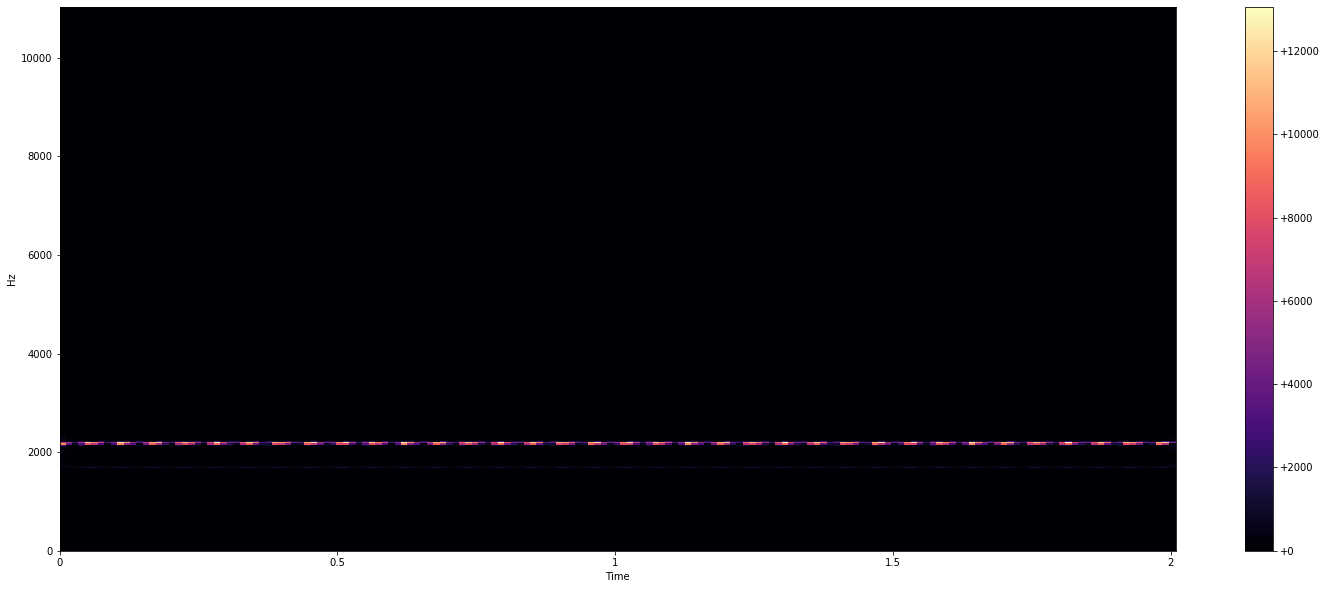

In [120]:
plot_spectrogram(Y_bad, sr, HOP_LENGTH)

# Log-Amplitude of Spectrogram

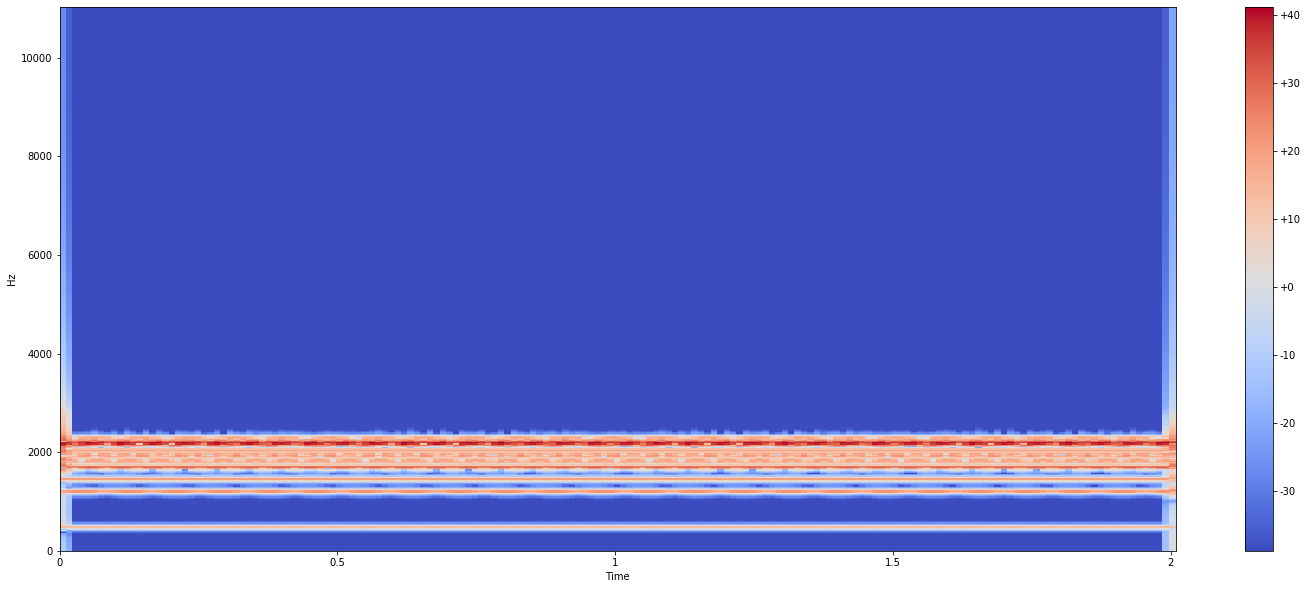

In [121]:
Y_log_bad = librosa.power_to_db(Y_bad)
plot_spectrogram(Y_log_bad, sr, HOP_LENGTH)

# Log-Frequency Spectrogram

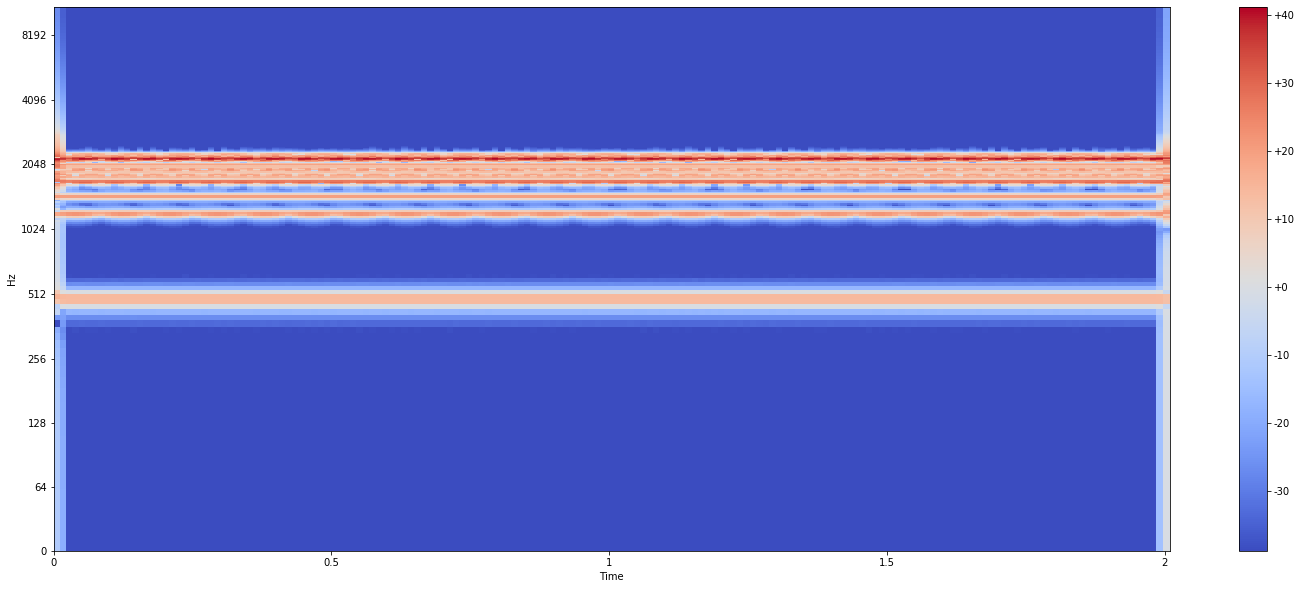

In [122]:
plot_spectrogram(Y_log_bad, sr, HOP_LENGTH, y_axis="log")

# Visualising the different bearings

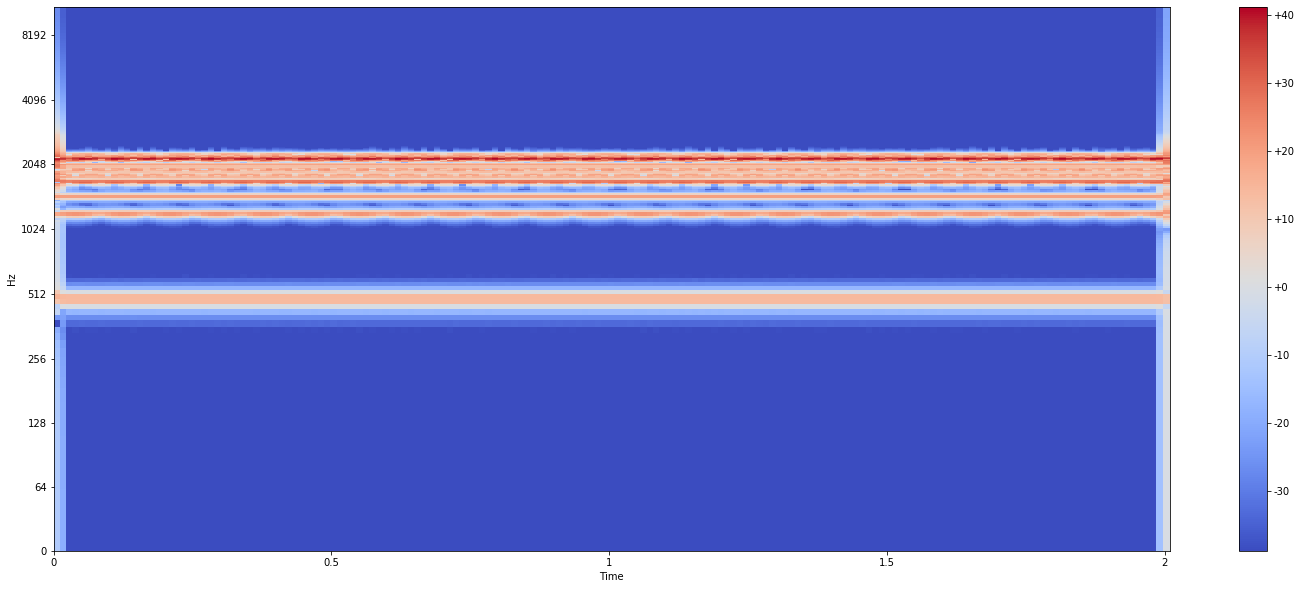

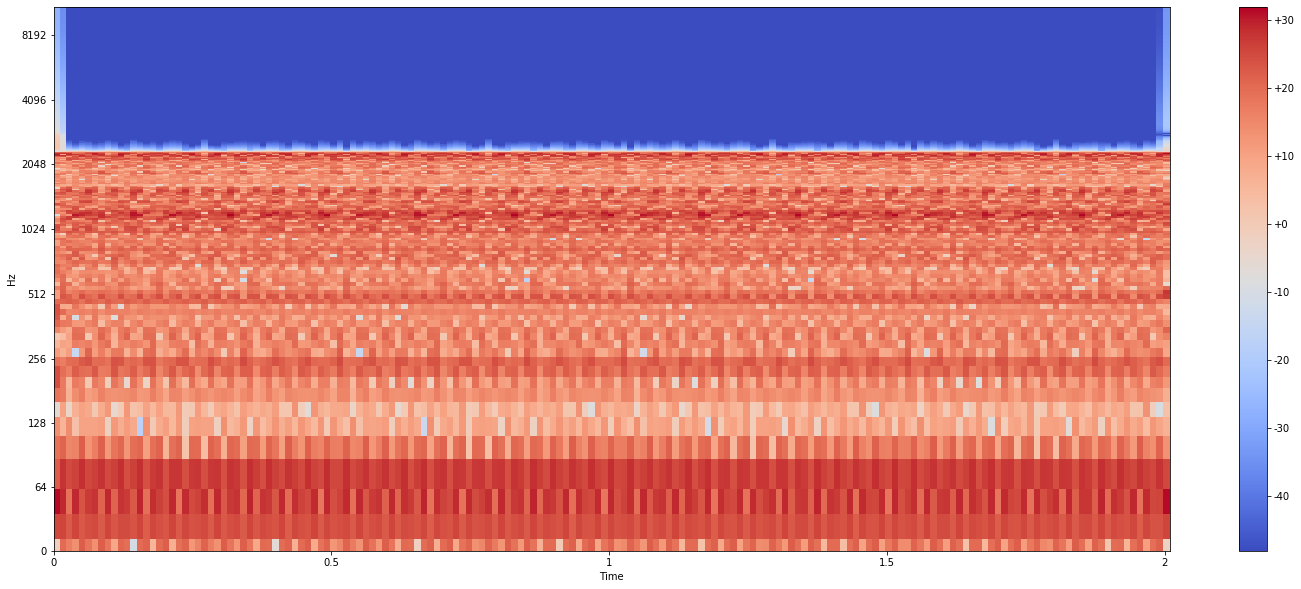

In [123]:
S_bad = librosa.stft(bad, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)
S_good = librosa.stft(good, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)

Y_bad = librosa.power_to_db(np.abs(S_bad) ** 2)
Y_good = librosa.power_to_db(np.abs(S_good) ** 2)

plot_spectrogram(Y_bad, sr, HOP_LENGTH, y_axis="log")
plot_spectrogram(Y_good, sr, HOP_LENGTH, y_axis="log")